# TP3 : Un peu d'analyse de données
## Rémi Laborie

### Première partie: classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np

couleur1 = "r"
x1 = 0.4
y1 = 0.4

couleur2 = "b"
x2 = 0.8
y2 = 0.8

### Classe Point

In [2]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)

    def __rmul__(self, k):
        return Point(self.x * k, self.y * k)

    def __truediv__(self, k):
        return Point(self.x / k, self.y / k)

    def __repr__(self):
        return "(x : " + str(self.x) + " y: " + str(self.y) + ")"

    def __iter__(self):
        return iter([self.x, self.y])

    def plot(self, t):
        plt.plot(self.x, self.y, t)

### Classe Groupe

In [3]:
class Groupe:
    def __init__(self, points=None):
        if points is None:
            points = np.array([])
        self.points = points

    def __iter__(self):
        return iter(self.points)

    def __repr__(self):
        return str(self.points)

    def __len__(self):
        return len(self.points)

    def add_point(self, point):
        self.points = np.array(list(self.points) + [point])

    def get_centre(self):
        """
        mx = 1/len(self) * np.array([p.x for p in self]).sum()
        my = 1/len(self) * np.array([p.y for p in self]).sum()
        return Point(mx, my)
        """
        return np.mean(self.points)

    def plot(self, t):
        #plt.plot([point.x for point in self], [point.y for point in self], t)
        for point in self.points:
            point.plot(t)


1. En utilisant la fonction random.random(), faire une fonction qui génère un "nuage" de n points autour d'une position donnée (x0,y0), avec un étalage réglable (distance maxi par rapport à la position donnée).

<ipython-input-4-3cfe55d5888d>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


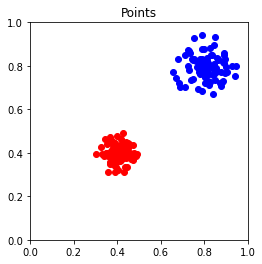

In [4]:
"""
0 < _ < 1
0 < _ < 2scale
x < _ < x+2scale
x-scale < _ < x+scale
"""

def blob_rectangle(n, x=0.5, y=0.5, scale=0.5):
    xs = np.random.random(n) * scale * 2 + x - scale
    ys = np.random.random(n) * scale * 2 + y - scale
    return Groupe(np.array([Point(xs[i], ys[i]) for i in range(n)]))

def blob(n, x=0.5, y=0.5, scale=0.5):
    r = np.random.random(n) * scale
    teta = np.random.random(n) * 2 * np.pi
    xs = x + r * np.cos(teta)
    ys = y + r * np.sin(teta)
    return Groupe(np.array([Point(xs[i], ys[i]) for i in range(n)]))

def plot_new(title=""):
    plt.figure()
    plt.title(title)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.axes().set_aspect('equal')

plot_new("Points")
g1 = blob(100, x1, y1, scale=0.1)
g2 = blob(100, x2, y2, scale=0.15)

g1.plot(couleur1 + "o")
g2.plot(couleur2 + "o")
plt.show()

2. Une fonction qui détermine le centre d'un groupe

<ipython-input-4-3cfe55d5888d>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


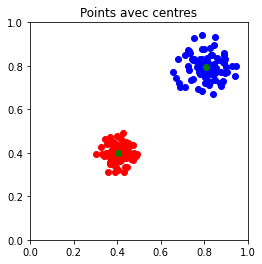

In [5]:
def centre(group):
    mx = 1/len(group) * np.array([p.x for p in group]).sum()
    my = 1/len(group) * np.array([p.y for p in group]).sum()
    return Point(mx, my)

c1 = g1.get_centre()
c2 = g2.get_centre()

plot_new("Points avec centres")
g1.plot(couleur1 + "o")
g2.plot(couleur2 + "o")

c1.plot("go")
c2.plot("go")
plt.show()

Voici une fonction qui calcule le séparateur de deux groupes (la médiatrice): pour cela il suffit de renvoyer un point de la droite, par exemple le milieu M des centres des 2 groupes, et un vecteur normal à la droite w⃗

(par exemple le vecteur défini par les deux centres). La fonction suppose que la fonction "centre" a déjà été écrite, et que g1, g2, c1 et c2 sont des vecteurs ou matrices numpy. Adaptez si vous avez fait différemment pour les fonctions blob et centre.

La fonction qui affiche le séparateur est donnée aussi

<ipython-input-4-3cfe55d5888d>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


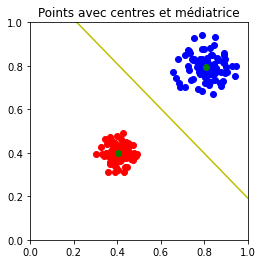

In [6]:
"""
def plot_mediatrice(c1, c2):
    m = Point((c1.x + c2.x) / 2, (c1.y + c2.y) / 2)
    a = - ((c2.x - c1.x) / (c2.y - c1.y))
    b = m.y - a*m.x
    plt.plot([0, 1], [b, a + b])
    return m, Point((c2.x - c1.x), (c2.y - c1.y))
"""
def separateur(g1,g2):
    """renvoie le milieu du segment qui relie les centres de g1 et g2, et un vecteur directeur de la médiatrice"""
    c1 = g1.get_centre()
    c2 = g2.get_centre()
    m = 0.5*(c1+c2)
    c1x, c1y = c1
    c2x, c2y = c2
    return m, (c1x - c2x, c1y - c2y)

def plot_separateur(m,w,scale=3):
    """à partir d'un point M et un vecteur directeur w, trace un segment de la droite correspondante
    (échelle/scale à ajuster selon la figure)
    """
    tw = (-w[1],w[0])
    plt.plot([m[0]+scale*tw[0],m[0]-scale*tw[0]],[m[1]+scale*tw[1],m[1]-scale*tw[1]],"y-")


plot_new("Points avec centres et médiatrice")
g1.plot(couleur1 + "o")
g2.plot(couleur2 + "o")

c1.plot("go")
c2.plot("go")

m, w = separateur(g1, g2)
plot_separateur((m.x, m.y), w)

plt.show()






































Ecrivez une fonction qui classifie un point P par rapport à cette droite
Ensuite générer des points au hasard avec des coordonnées entre 0 et 1, et afficher les comme des croix (symbole 'x') avec la couleur correspondant à la classe prédite par la fonction précédente.

<ipython-input-4-3cfe55d5888d>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


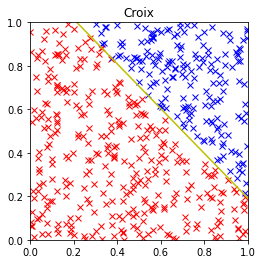

In [7]:
def plot_croix(points, m, w, couleur1="r", couleur2="b"):
    points1 = Groupe()
    points2 = Groupe()
    for point in points:
        mp = Point(point.y - m.y, point.x - m.x)
        #vdotMp = np.dot(np.array(w.x, w.y), np.array(mp.x, mp.y))
        w_dot_mp = w[0]*mp.y + w[1]*mp.x
        if w_dot_mp > 0:
            points1.add_point(point)
        else:
            points2.add_point(point)
    points1.plot(couleur1 + "x")
    points2.plot(couleur2 + "x")


points = blob_rectangle(500)

plot_new("Croix")
"""
g1.plot(couleur1 + "o")
g2.plot(couleur2 + "o")

c1.plot("go")
c2.plot("go")
"""

m, w = separateur(g1, g2)

plot_croix(points, m, w)
plot_separateur((m.x, m.y), w)

plt.show()

### Deuxième partie: de "vraies" données

In [8]:
data = np.genfromtxt('iris.txt', dtype=None,delimiter=',',names=True,encoding=None)
data

array([(5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
       (4.9, 3. , 1.4, 0.2, 'Iris-setosa'),
       (4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
       (4.6, 3.1, 1.5, 0.2, 'Iris-setosa'),
       (5. , 3.6, 1.4, 0.2, 'Iris-setosa'),
       (5.4, 3.9, 1.7, 0.4, 'Iris-setosa'),
       (4.6, 3.4, 1.4, 0.3, 'Iris-setosa'),
       (5. , 3.4, 1.5, 0.2, 'Iris-setosa'),
       (4.4, 2.9, 1.4, 0.2, 'Iris-setosa'),
       (4.9, 3.1, 1.5, 0.1, 'Iris-setosa'),
       (5.4, 3.7, 1.5, 0.2, 'Iris-setosa'),
       (4.8, 3.4, 1.6, 0.2, 'Iris-setosa'),
       (4.8, 3. , 1.4, 0.1, 'Iris-setosa'),
       (4.3, 3. , 1.1, 0.1, 'Iris-setosa'),
       (5.8, 4. , 1.2, 0.2, 'Iris-setosa'),
       (5.7, 4.4, 1.5, 0.4, 'Iris-setosa'),
       (5.4, 3.9, 1.3, 0.4, 'Iris-setosa'),
       (5.1, 3.5, 1.4, 0.3, 'Iris-setosa'),
       (5.7, 3.8, 1.7, 0.3, 'Iris-setosa'),
       (5.1, 3.8, 1.5, 0.3, 'Iris-setosa'),
       (5.4, 3.4, 1.7, 0.2, 'Iris-setosa'),
       (5.1, 3.7, 1.5, 0.4, 'Iris-setosa'),
       (4.6, 3.6, 1. , 0.2, 'Iri

### Classe Classe

In [9]:
class Classe(Groupe):
    def __init__(self, couleur, fleurs=None):
        super().__init__(fleurs)
        self.couleur = couleur

    def get_fleurs(self):
        return self.points

### Classe Fleur

In [10]:
class Fleur(Point):
    def __init__(self, nom, car1, car2):
        super().__init__(car1, car2)
        self.nom = nom

    def get_car1(self):
        return self.x

    def get_car2(self):
        return self.y

Faire une fonction qui affiche 2 caractéristiques choisies sur ces données, donnant une couleur différente à chaque groupe. Utilisez les fonctionalités de numpy

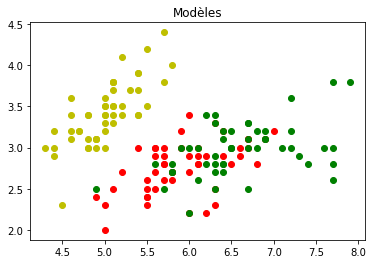

In [11]:
def get_classes(data, c1, c2, noms, couleurs):
    classes = {}
    for i, nom in enumerate(noms):
        fleurs = data[data["classe"] == nom]
        classes[nom] = Classe(couleurs[i], [Fleur(nom, fleur[c1], fleur[c2]) for fleur in fleurs])
    return classes

def plot_classes(classes):
    for key, value in classes.items():
        value.plot(value.couleur + "o")

    """ Ne fonctionne pas ?
    return max([car1 for car1 in [fleur.get_car1() for fleur in [fleurs for fleurs in fleurss]]]), \
           max([car2 for car2 in [fleur.get_car2() for fleur in [fleurs for fleurs in fleurss]]])
    """

    fleurss = [classe.get_fleurs() for classe in classes.values()]
    x = y = 0

    for fleurs in fleurss:
        tmp = max([car for car in [fleur.get_car1() for fleur in fleurs]])
        if x < tmp: x = tmp;
        tmp = max([car for car in [fleur.get_car2() for fleur in fleurs]])
        if y < tmp: y = tmp;
    return x, y


    # Retourne les valeurs max pour avoir la longueur des axes

noms = ("Iris-setosa", "Iris-versicolor", "Iris-virginica")
couleurs = ("y", "r", "g")
classes = get_classes(data, 0, 1, noms, couleurs)


plt.figure()
plt.title("Modèles")

plot_classes(classes)

plt.show()

Appliquer la première partie pour trouver des séparateurs des données, en considérant qu'il faut un séparateur pour chaque groupe par rapport aux deux autres ensembles (toujours restreint à deux caractéristiques). Trouver les 2 meilleures caractéristiques à prendre pour une bonne séparation.

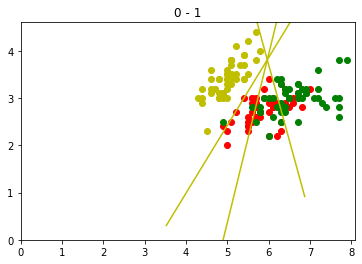

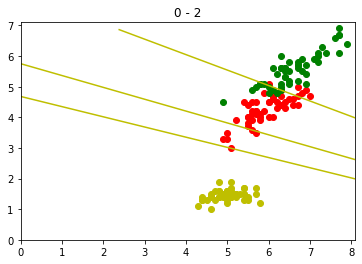

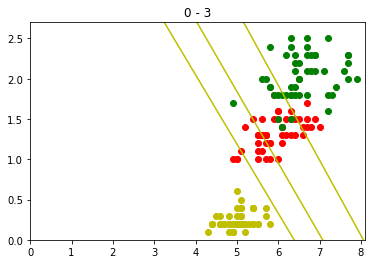

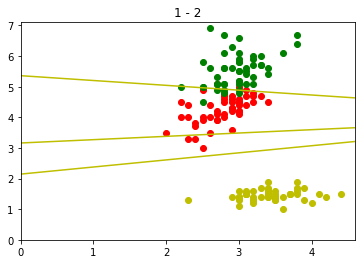

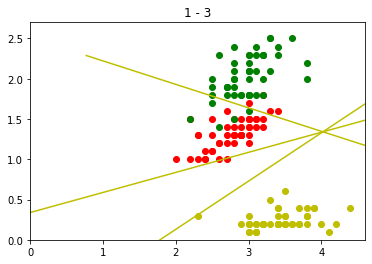

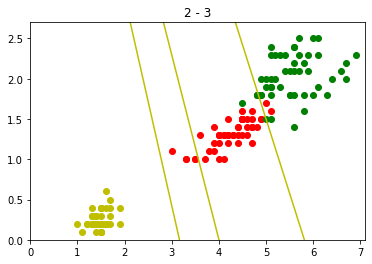

In [12]:


for (car1, car2) in [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]:
    plt.figure()
    plt.title(str(car1) + " - " + str(car2))

    classes = get_classes(data, car1, car2, noms, couleurs)
    x, y = plot_classes(classes)
    plt.xlim(0, x + 0.2)
    plt.ylim(0, y + 0.2)

    m01, w01 = separateur(classes["Iris-setosa"], classes["Iris-versicolor"])
    plot_separateur((m01.x, m01.y), w01)

    m02, w02 = separateur(classes["Iris-setosa"], classes["Iris-virginica"])
    plot_separateur((m02.x, m02.y), w02)

    m12, w12 = separateur(classes["Iris-versicolor"], classes["Iris-virginica"])
    plot_separateur((m12.x, m12.y), w12)

    plt.show()

La configuration 2 - 3 semble la mieux adapté pour comparer les fleurs

In [13]:
car1 = 2
car2 = 3

Tester vos "modèles" en calculant les séparateurs avec un sous-ensemble aléatoire des données, et en évaluant s'ils classent correctement les données restantes.

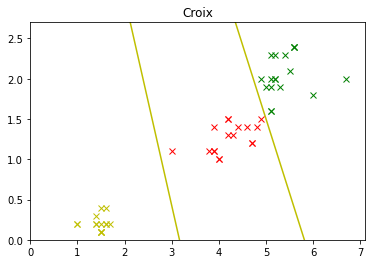

In [14]:
def get_couleur(fleur, m01, w01, m02, w02, m12, w12, couleurs):
    m01f = Point(fleur.y - m01.y, fleur.x - m01.x)
    w_dot_m01f = w01[0]*m01f.y + w01[1]*m01f.x
    m12f = Point(fleur.y - m12.y, fleur.x - m12.x)
    w_dot_m12f = w12[0]*m12f.y + w12[1]*m12f.x
    if w_dot_m01f > 0:
        return couleurs[0]
    elif w_dot_m12f > 0:
        return couleurs[1]
    else:
        return couleurs[2]

def get_fleur_random(n, data, c1, c2):
    fleurs = []
    for _ in range(n):
        fleur = data[int(np.random.random() * len(data))]
        fleurs.append(Fleur("<unknown>", fleur[c1], fleur[c2]))
    return fleurs

nb_fleurs = 50
fleurs = get_fleur_random(nb_fleurs, data, car1, car2)



plt.figure()
plt.title("Croix")

#x, y = plot_classes(classes)
plt.xlim(0, x + 0.2)
plt.ylim(0, y + 0.2)

m01, w01 = separateur(classes["Iris-setosa"], classes["Iris-versicolor"])
plot_separateur((m01.x, m01.y), w01)

m12, w12 = separateur(classes["Iris-versicolor"], classes["Iris-virginica"])
plot_separateur((m12.x, m12.y), w12)

for fleur in fleurs:
    fleur.plot(get_couleur(fleur, m01, w01, m02, w02, m12, w12, couleurs) + "x")

plt.show()